#Praktikum 1

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Langkah 1: Import Library

In [6]:
import numpy as np
import pandas as pd

- Langkah ini digunakan untuk mengambil library NumPy dan Pandas yang digunakan untuk manipulasi data

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/File Praktikum 2/dataset.csv')

Langkah ini digunakan untuk membaca data dari file csv dengan menggunakan Pandas. Disini file disimpan pada temporarily file


In [8]:
data.head()

data.shape

data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


- data.head digunakan untuk menampilkan beberapa data awal
- data.shape digunakan untuk menampilkan ukuran data yang telah diimport
- data.info digunakan untuk menampilkan informasi-informasi pada data
- data.describe digunakan untuk menampilkan deskripsi statistik data untuk memahami karakteristik data

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

- import library matplotlib dan seaborn dilakukan untuk visualisasi data

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

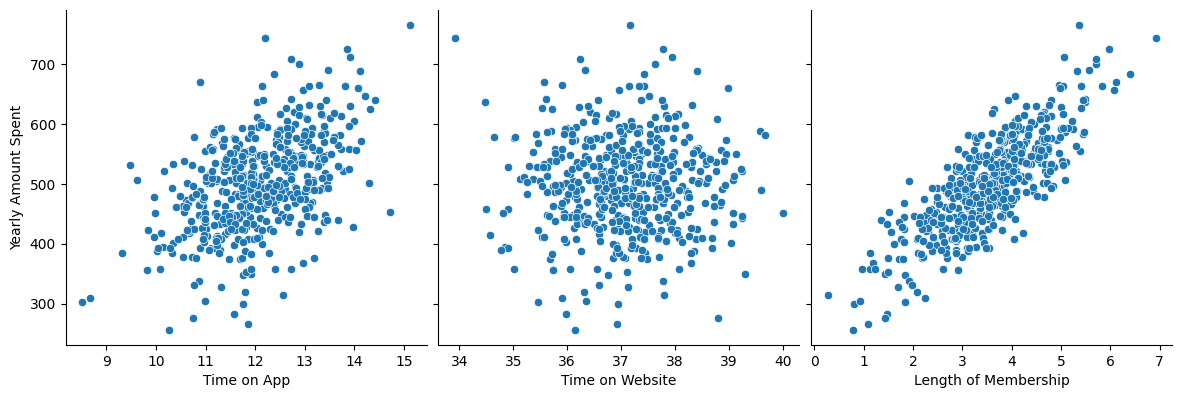

In [10]:
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show

- langkah ini dilakukan untuk menampilkan hubungan antara variabel bebas dan variabel target dalam bentuk scatter plot graph

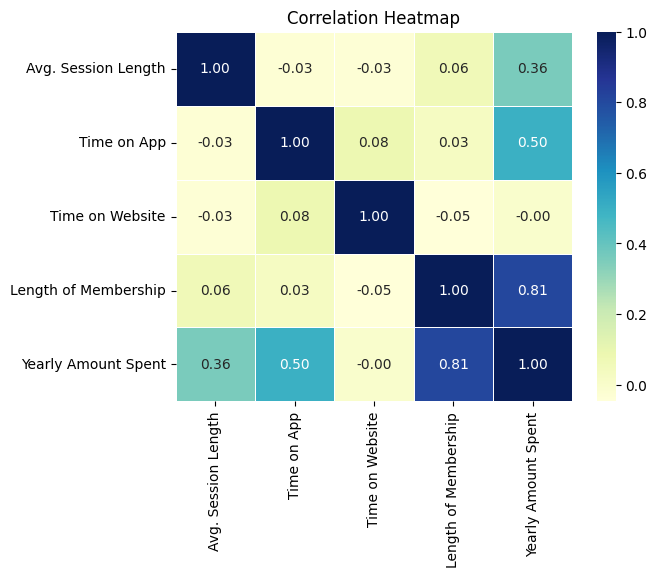

In [12]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap for numeric data correlation
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
X = data['Length of Membership']
y = data['Yearly Amount Spent']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)

In [14]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

<ipython-input-15-5c3d6e4a8129>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(X_train, lr.params[0] + lr.params[1] * X_train, 'r')


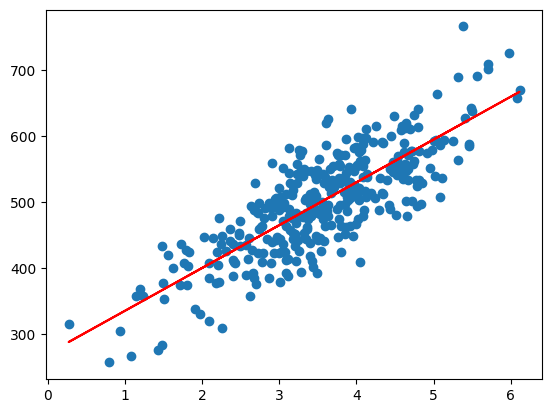

In [15]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.params[0] + lr.params[1] * X_train, 'r')
plt.show()

#Analisis Residual

In [16]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

<ipython-input-17-8ff894b8cdf0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


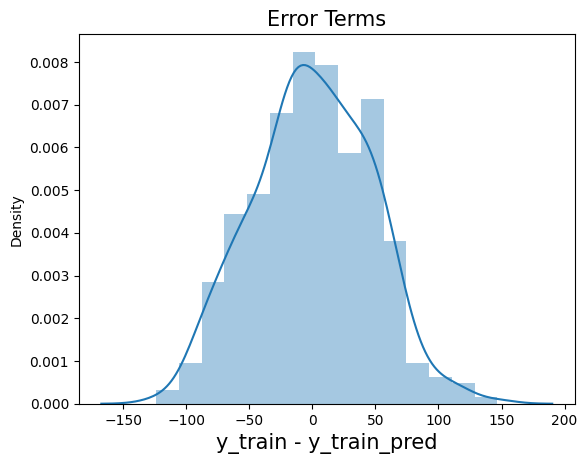

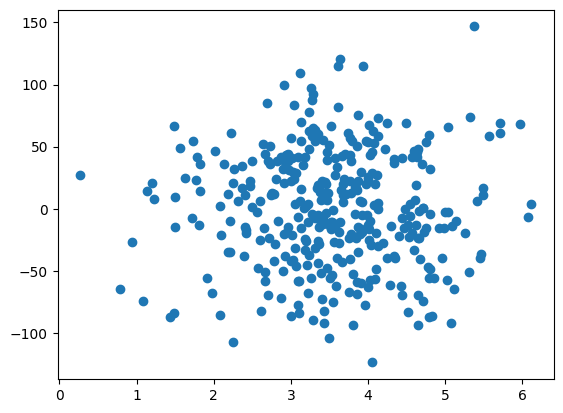

In [17]:
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

plt.scatter(X_train, res)
plt.show()

Melakukan visualisasi untuk hasil residual dan ditampilkan menggunakan 2 diagram. diagram histogram dan diagram scarter

#Prediksi pada Data Uji dan Evaluasi Model

In [18]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

- Melakukan pengujian data dengan variabel x_test_sm yang digunakan untuk menyimpan data yang diambil dari x_test yang ditambahkan nilai konstanta menggunakan statsmodel.
- Pada variabel y_test_pred dilakukan penyimpanan nilai dari hasil prediksi nilay menggunakan model regresi linear.

In [19]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

Menghitung nilai R-Squared untuk kinerja model dengan menggunakan r2_score dari sklearn.

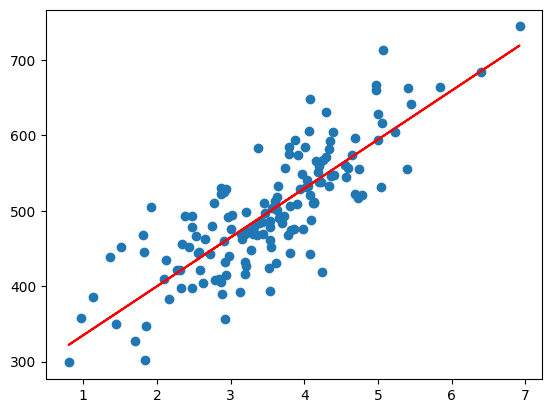

In [20]:
plt.scatter(X_test,y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

Melakukan visualisasi data dari dua kode diatas menggunakan diagram scatter

# Praktikum 2

In [21]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/File Praktikum 2/Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

- Import data dan melakukan pemilihan data berdasarkan index

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

- Import library fungsi standardscaler dari sklearn
- Melakukan fitur scaler untuk mengubah skala dalam dataset agar memiliki rentang nilai

In [23]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

- Menggunakan fungsi SVR dari library sklearn untuk pembuatan model SVR dengan kernel Radial basis Function dan melatih data yang telah diubah skalanya dalam kode sebelumnya

<ipython-input-24-16b49e598bbf>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


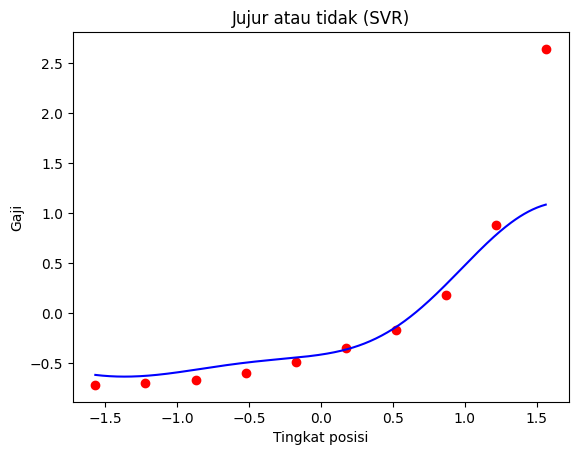

In [24]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

- Melakukan visualisasi data hasil prediksi dari langkah sebelumnya yang telah diproses melalui model SVR. Data ditampilkan menggunakan diagram scatter, titik merah menunjukkan data asli dan titik biru merupakan prediksi SVR.

In [25]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]]) #membuat array 2d yang berisikan nilai 6.5
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi) # melakukan scaling pada tingkat_posisi_prediksi dengan object sc_x yang telah di fitkan sebelumnya
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi) #melakukan prediksi pada gaji menggunakan model SVR "Regesor" dengan input tingkat_posisi_prediksi
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1)) #megembalikan hasil prediksi (gaji_prediksi) ke skla aslinya

- Menggunakan model SVR untuk memprediksi gaji dari tingkat posisi.

In [26]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


- melakukan print data untuk variabel array gaji_prediksi dengan nilai pertama yang telah diproses kode sebelumnya.

In [27]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

mae = mean_absolute_error(y_actual, y_pred)

mse = mean_squared_error(y_actual, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


- Melakukan evaluasi mode SVR dengan syarat semakin kecil nilai perhitungan MAE,MSE,RMSE dan semakin besar nilai R-Squared maka semakin baik performa model

#Tugas Praktikum

1. Import data dan library

In [29]:
# import library yang dibutuhkan
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


2. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas dan variabel target

In [30]:
df = pd.DataFrame(data)

# Variabel bebas (fitur) dan variabel target
X = df.drop(columns='charges')
y = df['charges']

3. Melakukan Klasifikasi data

In [31]:
categorical_features = ['sex', 'smoker', 'region']
numeric_features = ['age', 'bmi', 'children']

4. Proses Scaling (perlu dilakukan)

In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

5. Pipeline Model Multiple Linear Regression menggunakan Scikit-learn

In [34]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])


6. Pembagian dataset

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- Langkah ini dilakukan untuk membagi menjadi data train dan data test

7. Training model dan prediksi

In [38]:
#Training
model.fit(X_train, y_train)

#Prediksi
y_pred = model.predict(X_test)

8. Visualisasi data

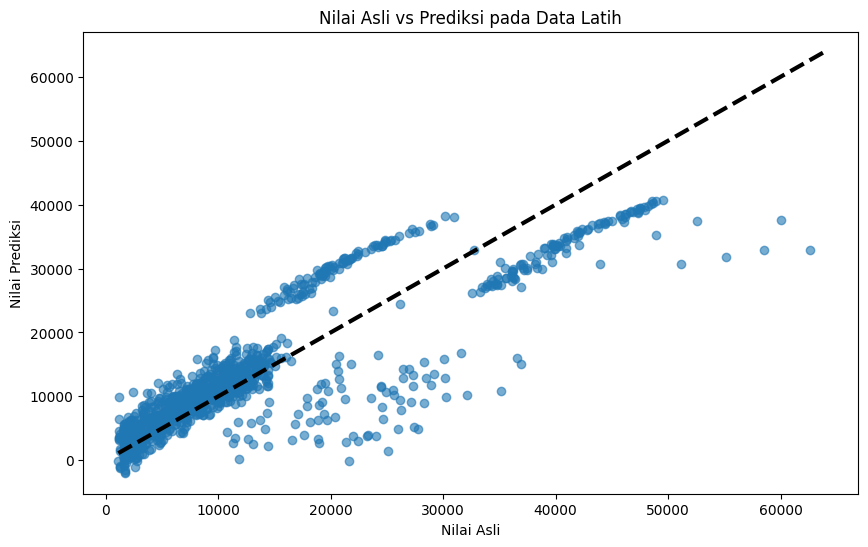

In [39]:
y_train_pred = model.predict(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.title('Nilai Asli vs Prediksi pada Data Latih')
plt.xlabel('Nilai Asli')
plt.ylabel('Nilai Prediksi')
plt.show()

9. Evaluasi Model dengan menghitung metrik menggunakan MSE, MAE, dan R-Squared

In [40]:
#Evaluasi model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

R-squared: 0.7835929767120722
Mean Squared Error (MSE): 33596915.851361476
Mean Absolute Error (MAE): 4181.194473753652


Berdasarkan nilai MSE, MAE, dan R-squared yang diperoleh, model memiliki performa yang cukup baik dalam memprediksi biaya asuransi. Namun, perlu diingat bahwa evaluasi model ini hanya berdasarkan satu set data dan mungkin perlu dilakukan evaluasi lebih lanjut dengan menggunakan teknik cross-validation untuk memastikan generalisasi model.